In [1]:
# basic imports
import math
from latexify import with_latex
import matplotlib.pyplot as plt

# $Q_1$

In [2]:
from library.matrix import Matrix, identity, zeros
from library.linear_equations import LU_Decomposition, forward_propagation, backward_propagation

In [3]:
A = Matrix(
    [
        [0.2, -5, 3, 0.4, 0],
        [-0.5, 1, 7, -2, 0.3],
        [0.6, 2, -4, 3, 0.1],
        [3, 0.8, 2, -0.4, 3],
        [0.5, 3, 2, 0.4, 1]
    ], name="A"
)

B = identity(5, name = "B")

In [4]:
L, U = LU_Decomposition(A)

In [5]:
y = zeros([5, 5], name="y")
x = zeros([5, 5], name="A_inv")
for i in range(5):
    y[:, i] = forward_propagation(L, B[:, i])
    x[:, i] = backward_propagation(U, y[:, i])

In [6]:
print("Inverse of A is:")
print(x)

Inverse of A is:
A_inv = |-0.707  2.531   2.431   0.966   -3.902|
        |-0.193  0.310   0.279   0.057   -0.294|
        |0.021   0.365   0.286   0.050   -0.289|
        |0.273   -0.129  0.131   -0.141  0.448  |
        |0.781   -2.875  -2.678  -0.701  4.233  |



In [7]:
# verifying the inverse
A = Matrix(
    [
        [0.2, -5, 3, 0.4, 0],
        [-0.5, 1, 7, -2, 0.3],
        [0.6, 2, -4, 3, 0.1],
        [3, 0.8, 2, -0.4, 3],
        [0.5, 3, 2, 0.4, 1]
    ], name="A"
)
c = x@A
print(c)

A_inv×A = |0.999   0.000   -0.000  -0.000  -0.000|
          |-0.000  1.000   -0.000  -0.000  0.000  |
          |-0.000  0.000   0.999   0.000   0.000  |
          |-0.000  -0.000  0.000   0.999   0.000  |
          |0.000   -0.000  0.000   -0.000  1.000  |



# $Q_2$

In [8]:
from library.myrandom import Random
r = Random(0.46)

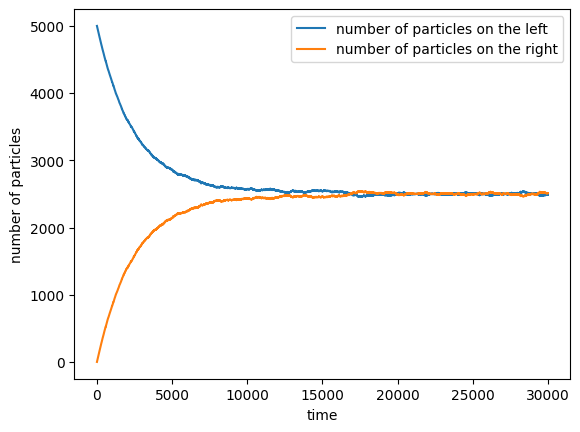

In [9]:
N = N_l = 5000

times, left, right = [], [], []
for time in range(30000):
    times.append(time)

    for particle in range(N):
        # determine this particle is in which side
        onLeft = r.LCG() < N_l/N

        # determine if this particle is going to travel or not
        go = r.LCG() < [1-N_l/N, N_l/N][onLeft]

        if go: N_l += [1, -1][onLeft] # if it wants to go: let it go

        break  # only one particle moves at a time
    
    left.append(N_l)
    right.append(N-N_l)

# plot the results
plt.plot(times, left, label="number of particles on the left")
plt.plot(times, right, label="number of particles on the right")
plt.xlabel("time")
plt.ylabel("number of particles")
plt.legend()

# $Q_3$

In [10]:
from library.nonlinear_equations import solve_newton_raphson

In [11]:
# F(x) = 0
F_0 = 2.5
@with_latex
def F(x): return F_0 - x*math.exp(x)
F

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x20819765e80>

In [12]:
x = solve_newton_raphson(F, delta = 1e-4)
print(f"The spring will be stretched to {x} m.")

The spring will be stretched to 0.9585 m.


c:\Users\amukh\OneDrive\Desktop\P346\working\library\nonlinear_equations.py:71: UserWarning: No derivative provided, using numerical differentiation
  warnings.warn("No derivative provided, using numerical differentiation")


# $Q_4$

In [13]:
from library.integration import simpson_rule
from math import sin, pi

In [14]:
L = 1
g = 9.8
c = 4*(L/g)**0.5

a = sin(pi/8)
@with_latex
def f(x):
    return 1/math.sqrt(1-a**2*sin(x)**2)
f

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x2081975ac10>

In [15]:
I = simpson_rule(f, 0, pi/2, n = 10)
T = I*c
print(f"Time period of the pendulum is {T:.3f} seconds")

Time period of the pendulum is 2.087 seconds


# $Q_5$

In [16]:
from library.diffeq import c_ode

In [17]:
def dydt(t, y, v): return v
def dvdt(t, y, v): return -(0.02*v + 10)
t_0 = 0
y_0 = 0
z_0 = 10
h = 0.01

ts, ys, vs = c_ode([dydt, dvdt], [t_0, y_0, z_0], 1.5, h)
print(f"max height = {max(ys):.3f} m")

max height = 4.934 m


Text(0.5, 0, 'height')

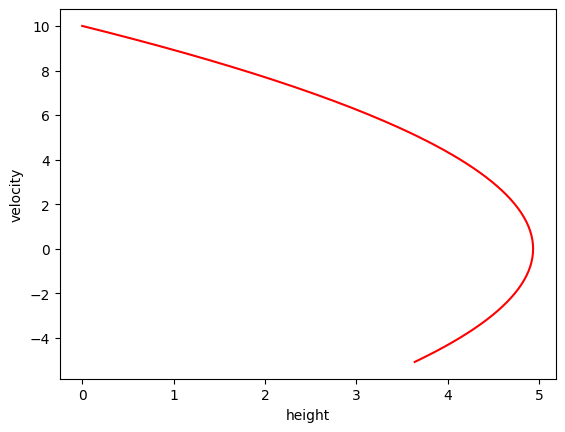

In [18]:
plt.plot(ys, vs, "r")
plt.ylabel("velocity")
plt.xlabel("height")

# $Q_6$

In [19]:
from library.eigen import get_eigen

In [20]:
A = Matrix(
    [
        [1, -2, 0, 5],
        [0, 7, 1, 5],
        [0, 4, 4, 0],
        [0, 0, 0, 2]
    ], name = "A"
)

In [21]:
e_val, e_vec, i = get_eigen(A, epsilon = 1e-3)

In [22]:
print(f"Number of iterations: {i}")
print(f"Eigenvalue: {e_val}")
print(e_vec)

Number of iterations: 11
Eigenvalue: 8.000
e-vector = |-0.198|
           |0.693  |
           |0.693  |
           |0.000  |



# $Q_7$

In [23]:
# importing the required libraries
from library.fitting import polynomial_fit
from library.nonlinear_equations import P

# loading the data
path = "data/esem4fit.txt"
x, y = [], []
with open(path) as f:
    for line in f.readlines():
        xi, yi = line.split()
        x.append([float(xi)])
        y.append([float(yi)])
x = Matrix(x, name="x", precision=2)
y = Matrix(y, name="y", precision=3)

In [26]:
coeff = polynomial_fit(x, y, 4).T().mat[0]
coeff

[0.23370226648351813,
 -1.1937592138092246,
 -0.4084737961691095,
 -0.8025653910658196]

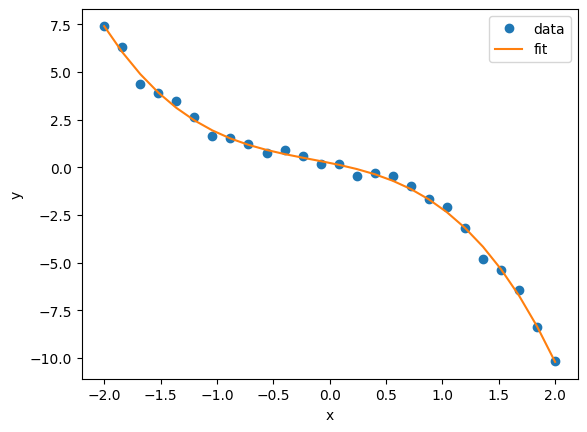

In [25]:
plt.plot(x.mat, y.mat, "o", label="data")
plt.plot(x.mat, [P(x[0], coeff[::-1]) for x in x.mat], label="fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()